In [75]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [76]:
# Read dataset to a dataframe
df = pd.read_csv('Kidney Patients Data.csv',encoding='windows-1254')

df.head()

,Name,Age,Gender,Address,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,TP,Having kidney disease
0,Yasawathi Karunarathna,46,Female,"Abayapura Rd, Padaviya",Primary,Forces,70000,Public well,Smoking,Yes,Yes,No,746985260.0,Yes
1,Wimalaweera,66,Male,"Ikiriwawa Rd ,Thmbuthegama",05 grade,Other,33500,Public well,Smoking,No,No,No,703569874.0,Yes
2,Wimalawathi,50,Female,"Ambalama Mawatha,Mahadivulwawa, Kakirawa",OL,Other,37000,Public well,Not smoking,No,No,No,758952834.0,Yes
3,Wijitha Amunugama,57,Male,"Labunoruwa ,Thirippane",AL,Retired,24500,Public well,Smoking,No,No,No,745296325.0,Yes
4,Wasanthi,50,Female,"Kala Gama,Thmbuthegama",AL,Retired,25000,Tube well,Smoking,Yes,Yes,No,375832456.0,Yes


In [77]:
df.columns

Index(['Name', 'Age', 'Gender', 'Address', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'TP', 'Having kidney disease'],
      dtype='object')

In [78]:
df.dtypes

Name                                                                            object
Age                                                                              int64
Gender                                                                          object
Address                                                                         object
Education                                                                       object
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      object
Monthly Income                                                                   int64
Source of water for drinking(tube well/public well/private well/pipe bourn)     object
Smorking or not                                                                 object
Using alcohol or not                                                            object
Using betel nut or not                                                          object
Do you have any of this disorders diabetes/

In [79]:
df = df.drop(['Name', 'Address','TP'], axis=1)

In [80]:
df.isnull().sum()

Age                                                                             0
Gender                                                                          0
Education                                                                       1
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      0
Monthly Income                                                                  0
Source of water for drinking(tube well/public well/private well/pipe bourn)     2
Smorking or not                                                                 3
Using alcohol or not                                                            0
Using betel nut or not                                                          0
Do you have any of this disorders diabetes/stress/blood pressure               10
Having kidney disease                                                           0
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
cols = ['Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ', 'Having kidney disease']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,Having kidney disease
0,46,0,13,2,70000,2,2,1,1,1,1
1,66,1,1,4,33500,2,2,0,0,1,1
2,50,0,12,4,37000,2,1,0,0,1,1
3,57,1,8,5,24500,2,2,0,0,1,1
4,50,0,8,5,25000,4,2,1,1,1,1


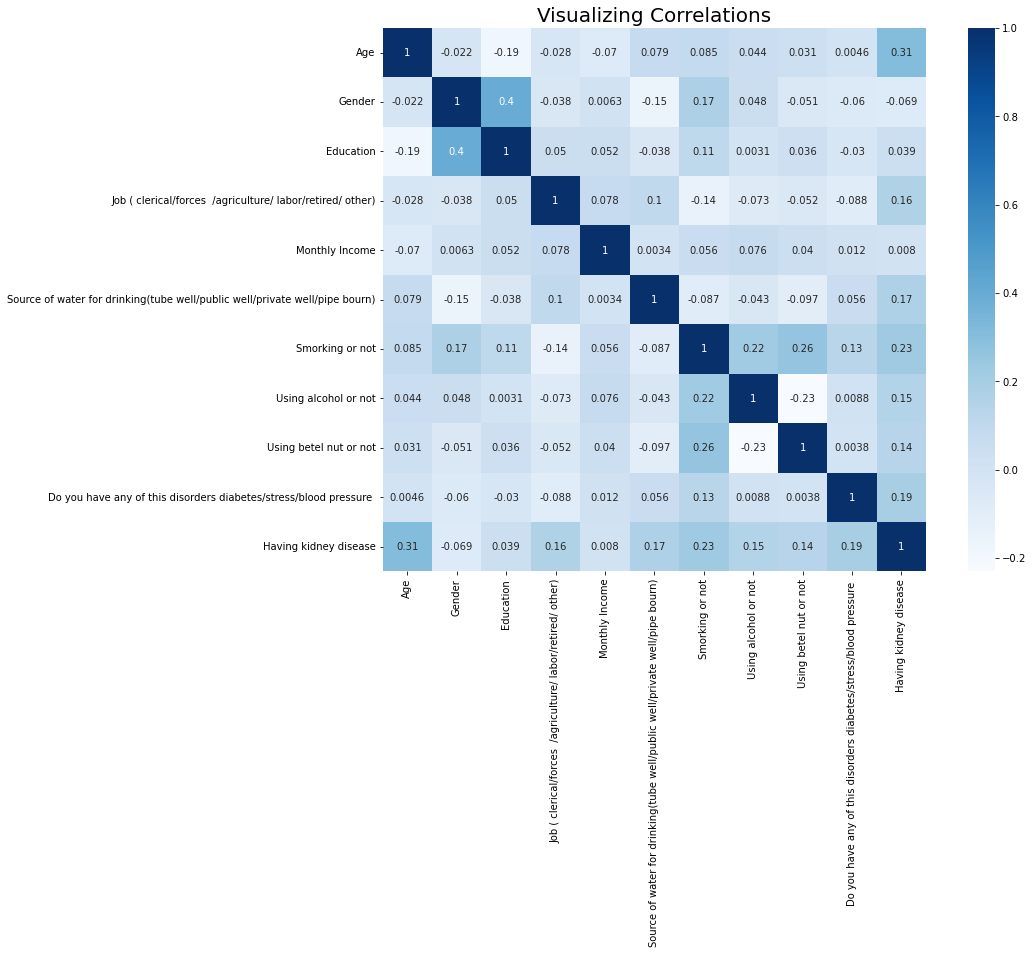

In [83]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [84]:
# sns.pairplot(df,hue='Having kidney disease')

In [85]:
# columns=df.columns
# columns=list(columns)
# columns.pop()

# sns.set(rc={'figure.figsize':(15,17)})
# sns.set_style(style='white')

# for i in range(len(columns)):
#     plt.subplot(4,3,i+1)
#     sns.distplot(df[columns[i]], hist=True, rug=True, color='b')

In [86]:
df.columns

Index(['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'Having kidney disease'],
      dtype='object')

In [87]:
x = df[['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',]].values


y = df['Having kidney disease'].values

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25)

In [89]:
x_train.shape
y_train.shape

(361,)

In [90]:
import xgboost as xgb

In [91]:
xgbc = xgb.XGBClassifier() 

In [92]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
score = xgbc.score(x_test, y_test)  
print("Training score: ", score)

Training score:  0.9504132231404959


In [94]:
y_pred = xgbc.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.049586776859504134

In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.22268088570756164

Confusion matrix

 [[59  2]
 [ 4 56]]


<AxesSubplot:>

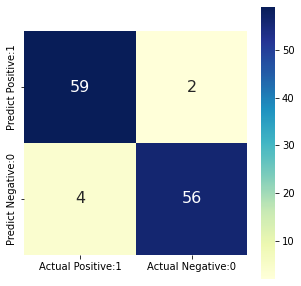

In [103]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True, ax=ax, annot_kws={"fontsize":16})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

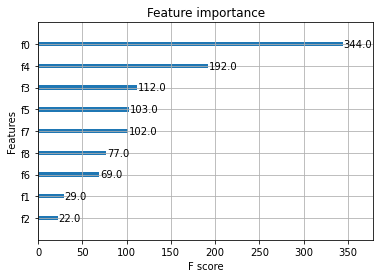

In [99]:
xgb.plot_importance(xgbc.fit(x_train,y_train))

# Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [100]:
df.head()

,Age,Gender,Education,Job ( clerical/forces /agriculture/ labor/retired/ other),Monthly Income,Source of water for drinking(tube well/public well/private well/pipe bourn),Smorking or not,Using alcohol or not,Using betel nut or not,Do you have any of this disorders diabetes/stress/blood pressure,Having kidney disease
0,46,0,13,2,70000,2,2,1,1,1,1
1,66,1,1,4,33500,2,2,0,0,1,1
2,50,0,12,4,37000,2,1,0,0,1,1
3,57,1,8,5,24500,2,2,0,0,1,1
4,50,0,8,5,25000,4,2,1,1,1,1


In [102]:
xgbc.predict([[46,0,13,2,70000,2,2,1,1]])

array([1])

In [ ]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(clf.predict([[1,1,1,1,1,1,1,1,1]]))